In [2]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.1/150.0 MB 10.7 MB/s eta 0:00:14
   - -------------------------------------- 4.5/150.0 MB 11.2 MB/s eta 0:00:14
   - -------------------------------------- 6.6/150.0 MB 10.9 MB/s eta 0:00:14
   -- ------------------------------------- 8.9/150.0 MB 11.3 MB/s eta 0:00:13
   --- ------------------------------------ 11.3/150.0 MB 11.4 MB/s eta 0:00:13
   --- ------------------------------------ 13.9/150.0 MB 11.3 MB/s eta 0:00:13
   ---- ----------------------------------- 16.0/150.0 MB 11.3 MB/s eta 0:00:12
   ---- ----------------------------------- 18.4/150.0 MB 11.3 MB/s eta 0:00:12
   ----- ---------------------------------- 20.7/150.0 MB 11.3 MB/s eta 0:00:12
   ------ --------------------------------- 23.3/150.0 MB 11.4 MB/s eta 0:00:12
   ------ --------------------------------- 25.7/150.0 MB 11.3 MB/s eta 0:00:11
   ------- -------------------------------- 28.0/150.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I_y     557 non-null    float64
 1   PF      557 non-null    float64
 2   e_PF    557 non-null    float64
 3   d_if    557 non-null    float64
 4   I_f     557 non-null    float64
dtypes: float64(5)
memory usage: 21.9 KB
None

First 5 rows of the dataset:
   I_y    PF  e_PF   d_if    I_f
0  3.0  0.66  0.34  0.383  1.563
1  3.0  0.68  0.32  0.372  1.552
2  3.0  0.70  0.30  0.360  1.540
3  3.0  0.72  0.28  0.338  1.518
4  3.0  0.74  0.26  0.317  1.497

Descriptive statistics:
              I_y          PF        e_PF        d_if         I_f
count  557.000000  557.000000  557.000000  557.000000  557.000000
mean     4.499820    0.825296    0.174704    0.350659    1.530659
std      0.896024    0.103925    0.103925    0.180566    0.180566
min      3.000000    0.650000    0.000000    0.037000

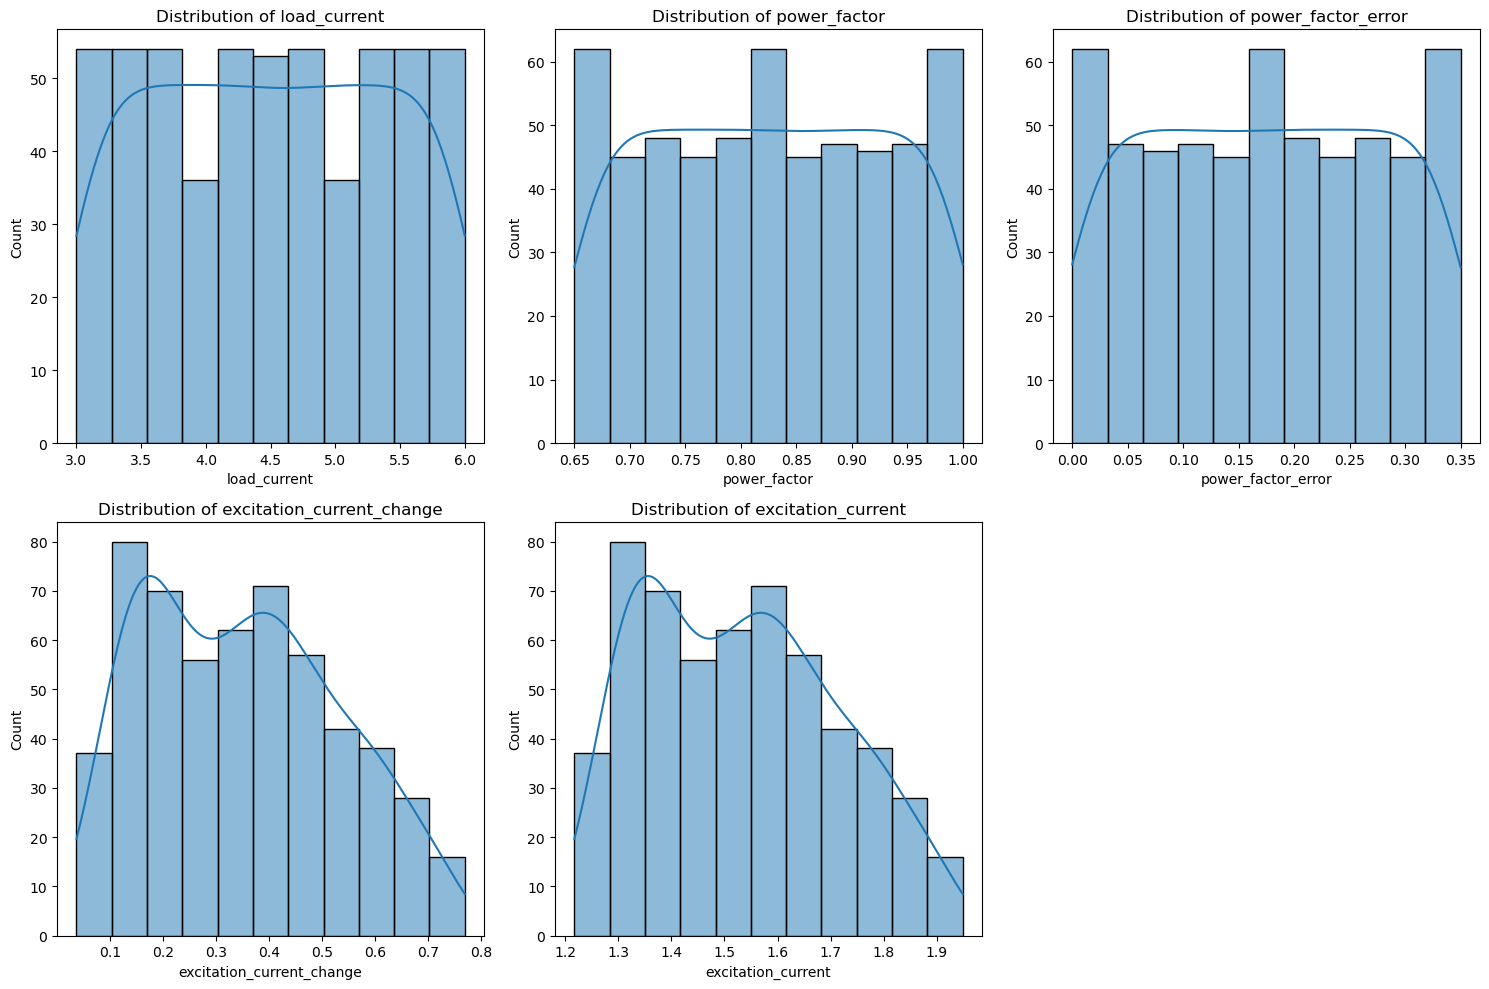

<Figure size 1200x800 with 0 Axes>

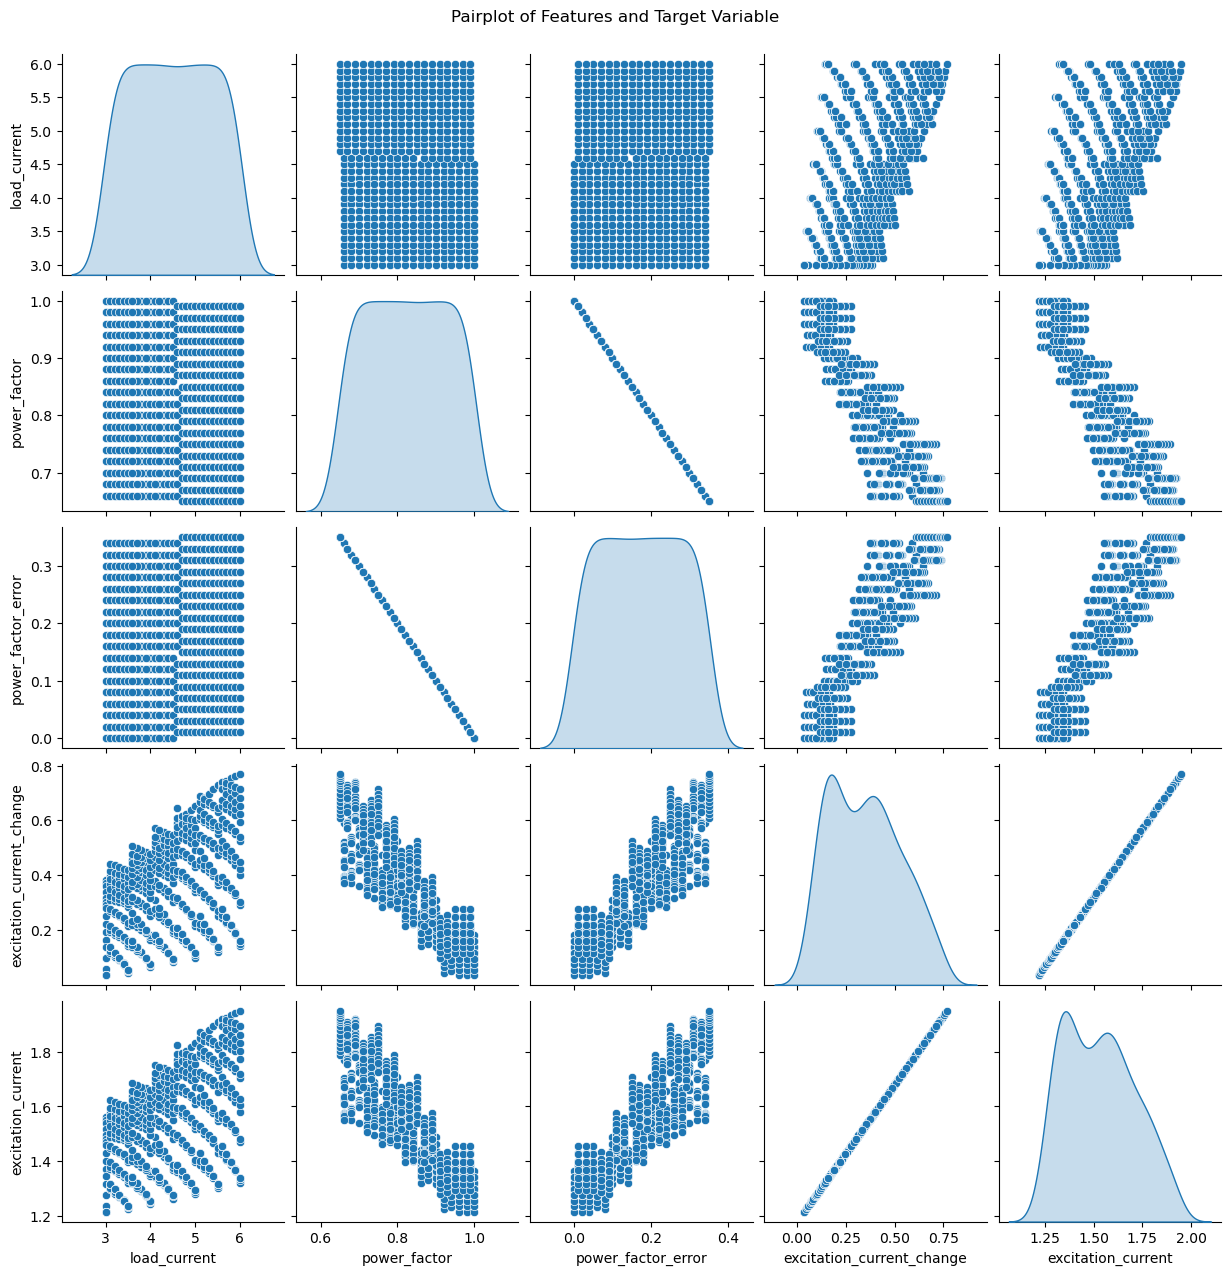

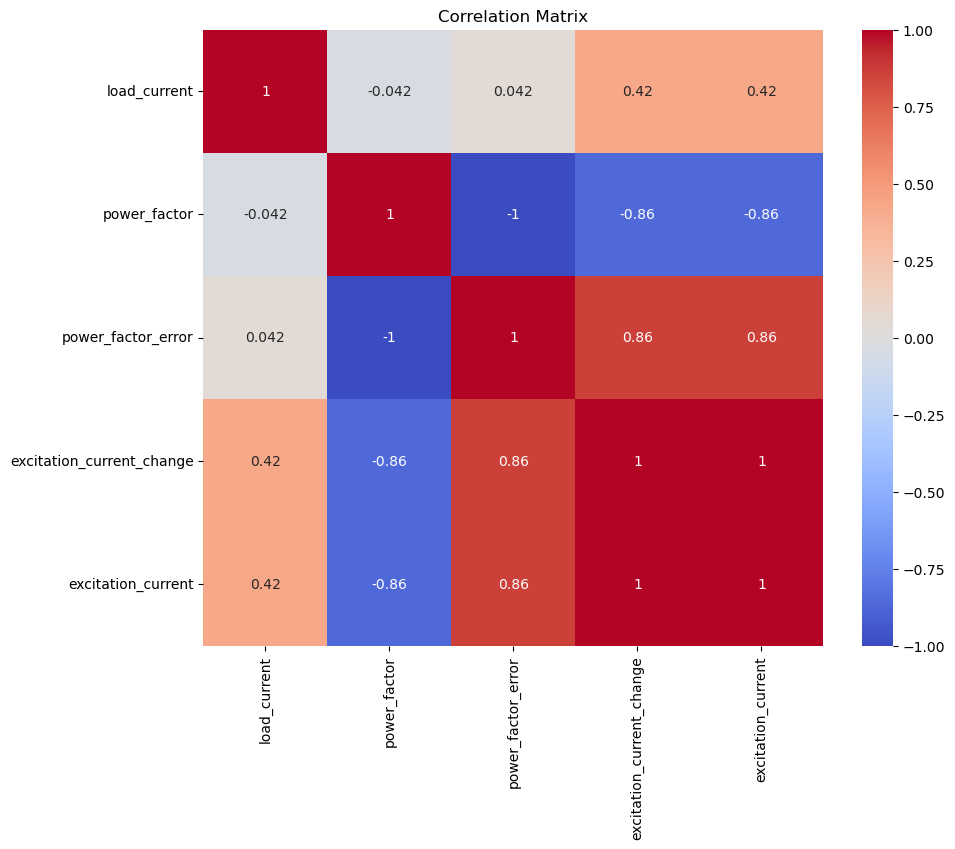


Linear Regression Performance:
Mean Squared Error: 0.000000
Mean Absolute Percentage Error: 0.000000
R-squared: 1.000000

Decision Tree Performance:
Mean Squared Error: 0.000010
Mean Absolute Percentage Error: 0.001226
R-squared: 0.999695

Random Forest Performance:
Mean Squared Error: 0.000006
Mean Absolute Percentage Error: 0.000833
R-squared: 0.999828

XGBoost Performance:
Mean Squared Error: 0.000016
Mean Absolute Percentage Error: 0.001750
R-squared: 0.999514

Cross-validation results (R2 scores):
Linear Regression: Mean R2 = 1.0000 ± 0.0000
Decision Tree: Mean R2 = 0.9990 ± 0.0010
Random Forest: Mean R2 = 0.9986 ± 0.0017
XGBoost: Mean R2 = 0.9985 ± 0.0014

Performing hyperparameter tuning for XGBoost...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best parameters found:
{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 9, 'model__n_estimators': 300, 'model__subsample': 0.9}

Tuned XGBoost Performance:
Mean Squared Error: 0.0000

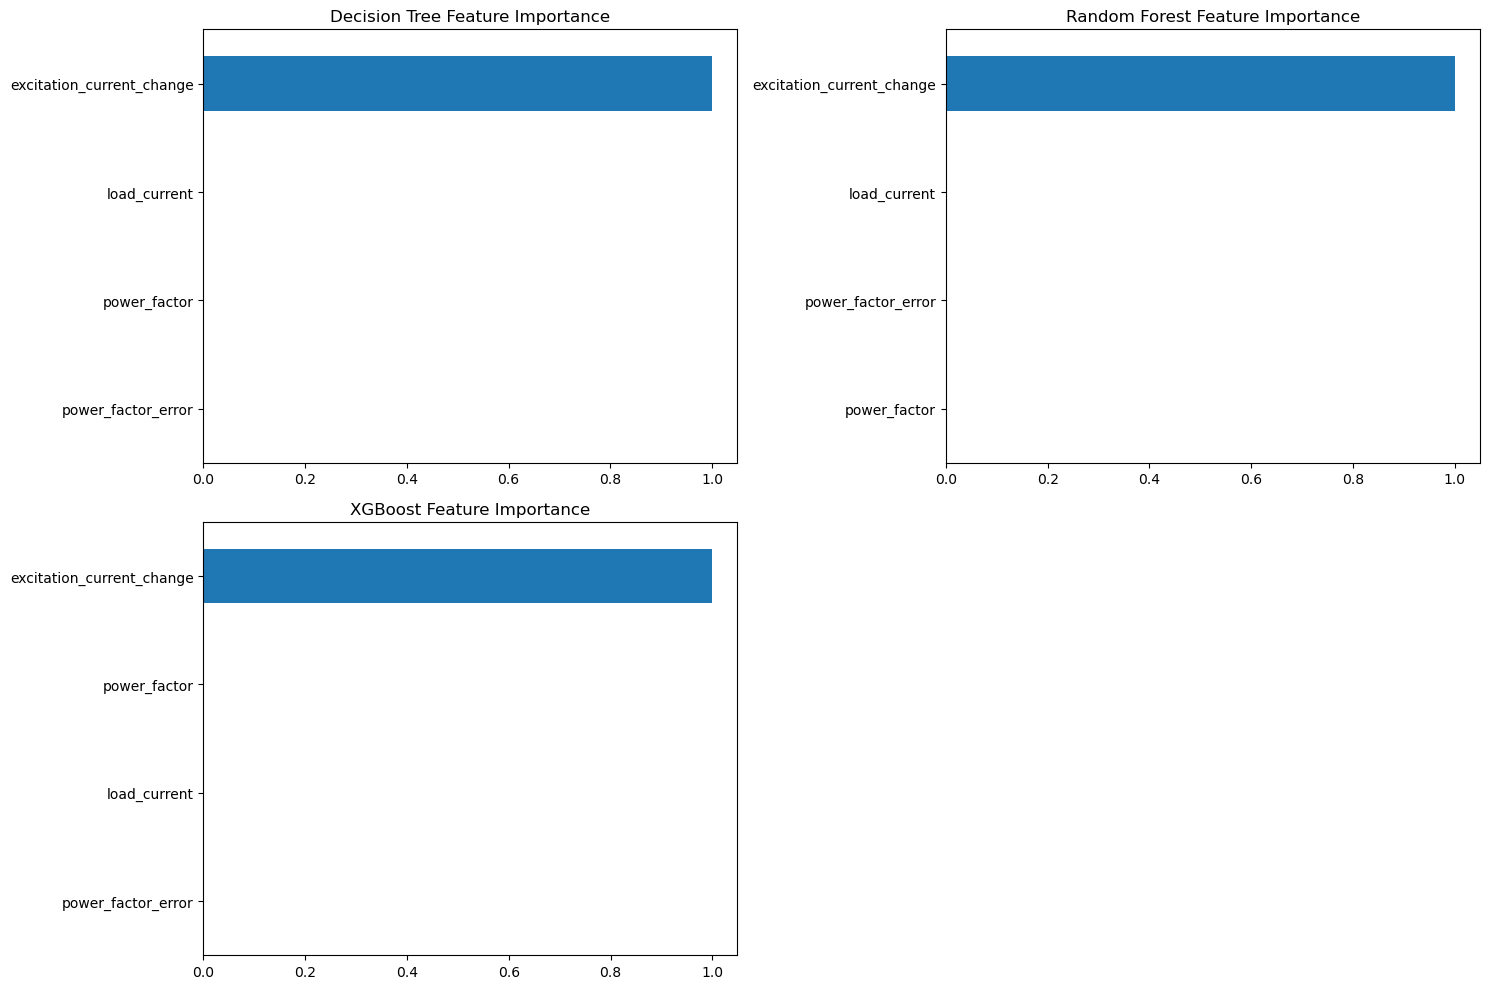

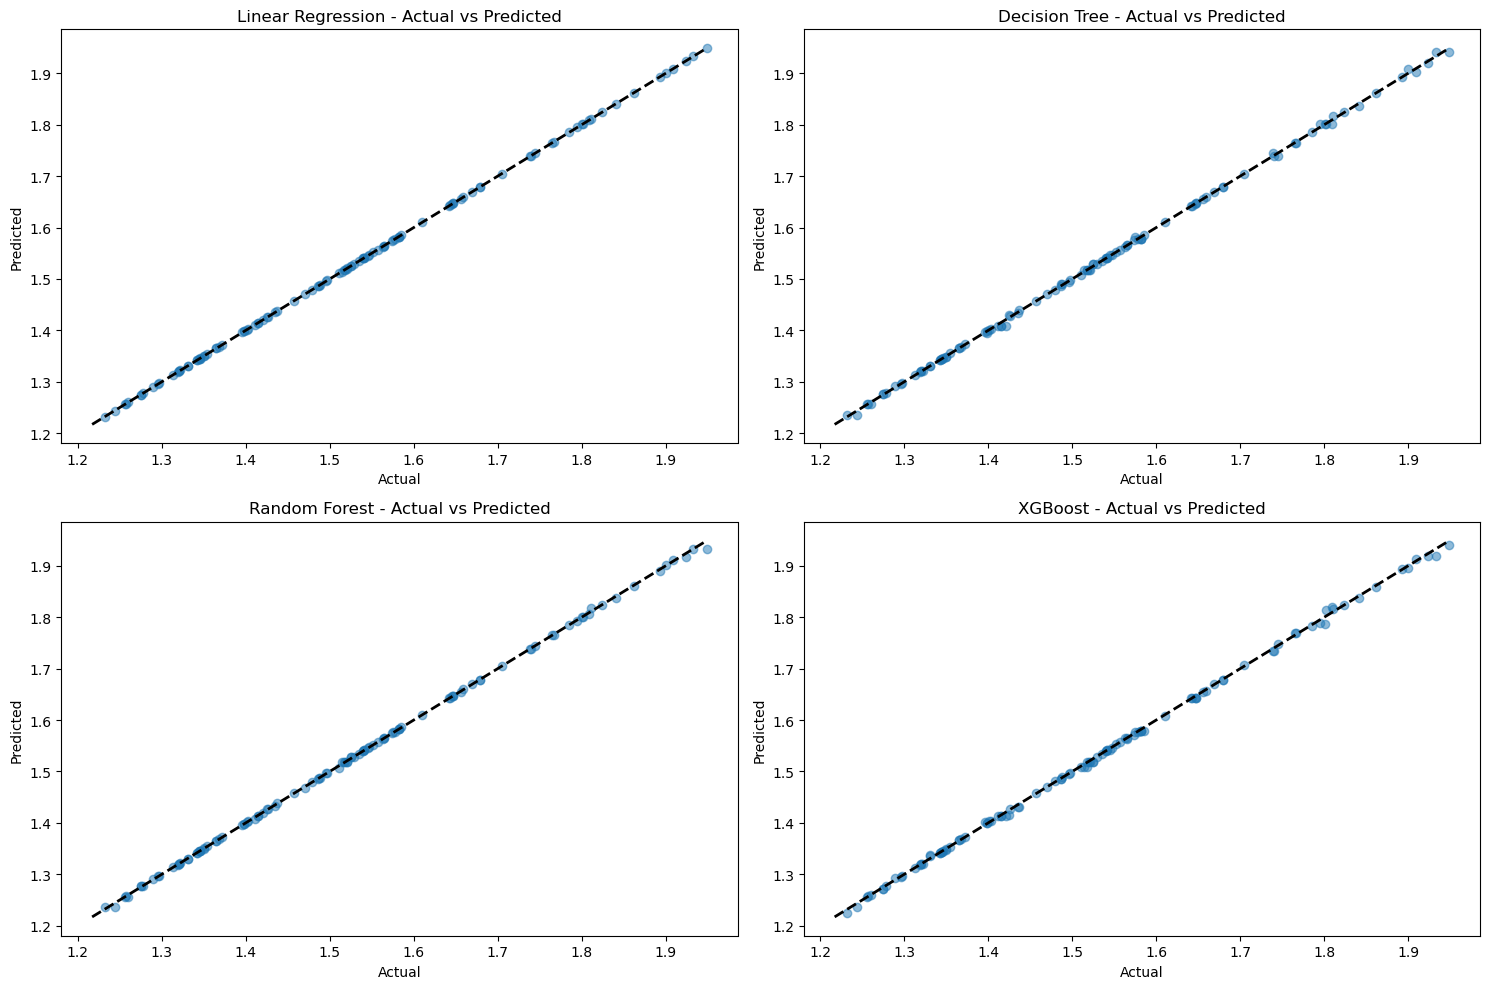

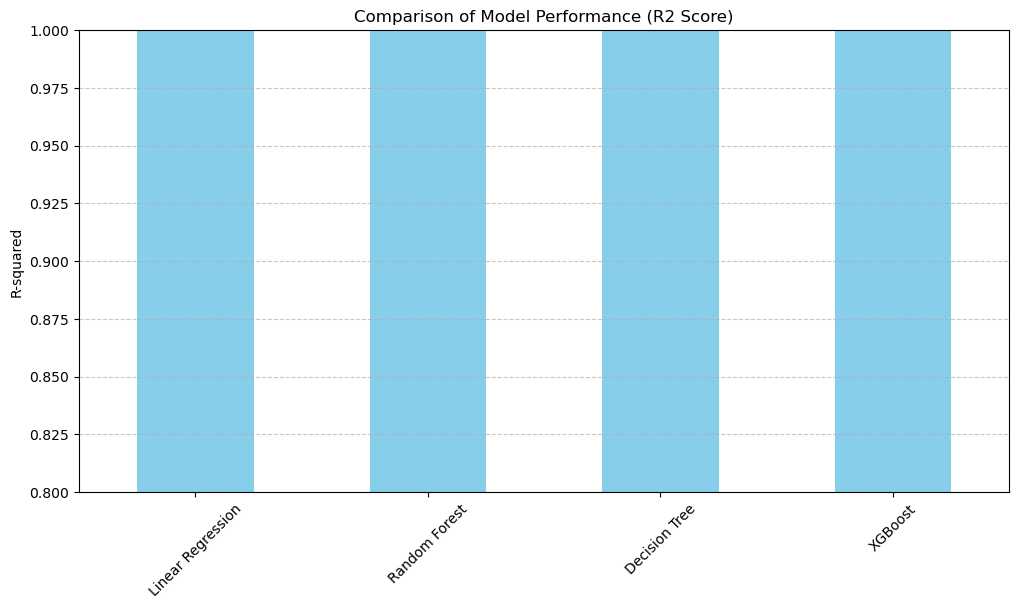


Final Model Performance Comparison:
                            MSE          MAPE        R2
Linear Regression  8.716209e-32  1.861376e-16  1.000000
Random Forest      5.791992e-06  8.330704e-04  0.999828
Decision Tree      1.026786e-05  1.225909e-03  0.999695
XGBoost            1.633887e-05  1.749643e-03  0.999514

Best model (XGBoost) saved as 'best_excitation_current_model.pkl'


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
df = pd.read_csv('SynchronousMachine.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDescriptive statistics:")
print(df.describe())

# Rename columns for clarity (based on the paper)
df.columns = ['load_current', 'power_factor', 'power_factor_error', 'excitation_current_change', 'excitation_current']

# Visualize the distribution of features and target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Visualize relationships between features and target
plt.figure(figsize=(12, 8))
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Features and Target Variable', y=1.02)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Prepare data for modeling
X = df.drop('excitation_current', axis=1)
y = df['excitation_current']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Create a pipeline for each model with standardization
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

# Train and evaluate models
results = {}
for name, pipeline in pipelines.items():
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MSE': mse,
        'MAPE': mape,
        'R2': r2,
        'model': pipeline
    }
    
    # Print results
    print(f"\n{name} Performance:")
    print(f"Mean Squared Error: {mse:.6f}")
    print(f"Mean Absolute Percentage Error: {mape:.6f}")
    print(f"R-squared: {r2:.6f}")

# Cross-validation for more robust evaluation
print("\nCross-validation results (R2 scores):")
for name, pipeline in pipelines.items():
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(f"{name}: Mean R2 = {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Hyperparameter tuning for the best performing model (XGBoost)
print("\nPerforming hyperparameter tuning for XGBoost...")

# Define parameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 6, 9],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0]
}

# Create grid search
grid_search = GridSearchCV(
    pipelines['XGBoost'],
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("\nBest parameters found:")
print(best_params)

# Evaluate tuned model
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mape_tuned = mean_absolute_percentage_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\nTuned XGBoost Performance:")
print(f"Mean Squared Error: {mse_tuned:.6f}")
print(f"Mean Absolute Percentage Error: {mape_tuned:.6f}")
print(f"R-squared: {r2_tuned:.6f}")

# Feature importance for tree-based models
plt.figure(figsize=(15, 10))
for i, (name, result) in enumerate(results.items()):
    if name in ['Decision Tree', 'Random Forest', 'XGBoost']:
        plt.subplot(2, 2, i)
        if name == 'XGBoost':
            importances = result['model'].named_steps['model'].feature_importances_
        else:
            importances = result['model'].named_steps['model'].feature_importances_
        feature_importance = pd.Series(importances, index=X.columns)
        feature_importance.sort_values().plot(kind='barh')
        plt.title(f'{name} Feature Importance')
plt.tight_layout()
plt.show()

# Actual vs Predicted plots
plt.figure(figsize=(15, 10))
for i, (name, result) in enumerate(results.items()):
    plt.subplot(2, 2, i+1)
    y_pred = result['model'].predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} - Actual vs Predicted')
plt.tight_layout()
plt.show()

# Compare model performances
metrics_df = pd.DataFrame.from_dict(results, orient='index')[['MSE', 'MAPE', 'R2']]
metrics_df = metrics_df.sort_values('R2', ascending=False)

plt.figure(figsize=(12, 6))
metrics_df['R2'].plot(kind='bar', color='skyblue')
plt.title('Comparison of Model Performance (R2 Score)')
plt.ylabel('R-squared')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print final results
print("\nFinal Model Performance Comparison:")
print(metrics_df)

# Save the best model (XGBoost)
import joblib
joblib.dump(best_model, 'best_excitation_current_model.pkl')
print("\nBest model (XGBoost) saved as 'best_excitation_current_model.pkl'")